In [13]:
import sklearn as sklearn
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint
np.random.seed(0)
X=np.genfromtxt("X_train.txt",delimiter=None)
Y=np.genfromtxt("Y_train.txt",delimiter=None)
Xte=np.genfromtxt("X_test.txt",delimiter=None)
X,Y=ml.shuffleData(X,Y)

In [12]:
Xtr,Xva,Ytr,Yva=ml.splitData(X,Y,0.50)
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
#from sklearn.ensemble import RandomForestRegressor
#clf=RandomForestRegressor(n_estimators=200)
#params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
params ={'learning_rate':0.01, 'n_estimators':400, 'subsample':1.0, 
         'min_samples_split':2, 
    'min_samples_leaf':1, 'min_weight_fraction_leaf':0.0, 'max_depth':3, 'min_impurity_decrease':0.0, 
     'alpha':0.9, 
    'verbose':0, 'max_leaf_nodes':None, 'warm_start':False}
clf = ensemble.GradientBoostingRegressor(**params)

param_dist = {"max_depth": [4, None],
              "max_features": sp_randint(1, 14),
              "min_samples_split": sp_randint(2, 14),
              "min_samples_leaf": sp_randint(2, 8),
              "bootstrap": [True, False]
              }
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(Xtr,Ytr)
YvaHat=random_search.predict(Xva)
mse=mean_squared_error(Yva, YvaHat)
print(mse)

ValueError: Invalid parameter bootstrap for estimator GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [3]:
Yte=random_search.predict(Xte)
np.savetxt('RandomizedCV.csv',
np.vstack( (np.arange(len(Yte)) , Yte[:]) ).T,
'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');       

In [14]:
Xtr,Xva,Ytr,Yva=ml.splitData(X,Y,0.80)
dtrain = xgb.DMatrix(Xtr, label=Ytr)
#dtest=xgb.DMatrix(Xva,label=Yva)

In [23]:
n=2
mseV=[]
nV=[]
while n<3:
    bst = xgb.XGBRegressor(max_depth=8, learning_rate=0.01, n_estimators=100,booster='gbtree')
    bst.fit(Xtr,Ytr)
    YvaHat=bst.predict(Xva)
    mse = mean_squared_error(Yva, YvaHat)
    mseV.append(mse)
    nV.append(n)
    print("n= "+str(n)+" , mse= "+str(mse))
    n+=2

n= 2 , mse= 3.5594331976252973


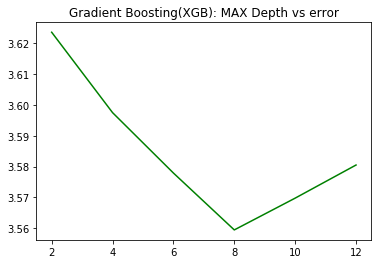

In [22]:
_,axis=plt.subplots() 
plt.title("Gradient Boosting(XGB): MAX Depth vs error")
axis.plot(nV,mseV,c='green')
plt.show()

In [55]:
Yte=bst.predict(Xte)
np.savetxt('GradBoost_xgb.csv',
np.vstack( (np.arange(len(Yte)) , Yte[:]) ).T,
'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');       